# Introduction
In this project, I will investigate the real-world dataset of the red and white vinho verde wine samples from the north of Portugal. The aims of this project were 1) to practice my data analysis skills using Python and 2) to find the useful insights of the datasets in order to answer these following questions:

#### #Q1: What chemical characteristic (volatile acidity, residual sugar, pH, alcohol) is  most likely to have a positive impact on the wine quality?
#### #Q2: Is a certain type of wine (red/white) associated with higher quality?
#### #Q3: What level of acidity (pH values) receives the highest average rating?
#### #Q4: Do wines with higher alcoholic content receive better ratings?
#### #Q5: Do sweeter wines (more residual sugar) receive better ratings?

The datasets for red and white wine used in this project can be found via this link: 

[Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

[White Wine Quality](https://www.kaggle.com/piyushagni5/white-wine-quality)

Preference:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# Assessing Data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
red_df = pd.read_csv('winequality-red.csv')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_df =pd.read_csv('winequality-white.csv', sep=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### I will quickly explore the two datasets for red and white wine to get to know more about the characteristics of the datasets:

In [7]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
red_df.shape, white_df.shape

((1599, 12), (4898, 12))

In [12]:
red_df.duplicated().sum(), white_df.duplicated().sum()

(240, 937)

In [15]:
red_df['quality'].nunique(), white_df['quality'].nunique()

(6, 7)

##### --> There are 1599 samples of red wine and 4898 samples of white wine. Each dataset has 12 columns with no missing values (no null). The red wine dataset has 240 duplicated rows while the white wine dataset has 937 duplicated rows. However, it is not necessary to drop these duplicated rows because the wine sample can get the same quality rating by different wine experts. There are 6 and 7 unique values of quality in the red and white wine dataset, respectively.

# Combining The Datasets

### To analyze the data more efficiently, I will combine the red and white wine dataset into one dataframe. In order to do so, a new column will need to be added to indicate whether the wine is red or white once the two datasets are combined.

In [16]:
# create color array for red dataframe:
red_wine = np.repeat('red', red_df.shape[0])

# create color array for white dataframe:
white_wine = np.repeat('white', white_df.shape[0])

Then a new column named 'color' with the appropriate color array will be added to each dataframe:

In [17]:
red_df['color'] = red_wine
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
white_df['color'] = white_wine
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


After adding the 'color' column to indicate the wine's color, the two dataframes will be combined into one in the following steps:

In [19]:
wine_df = red_df.append(white_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


To make it more convenient to work with the combined dataframe, the labels for columns where there are space in between will be replace with '_' instead. i.e. fixed acidity --> fixed_acidity

In [20]:
new_labels = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar','chlorides',
              'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality','color']

In [21]:
wine_df.columns = new_labels
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Then save the combined dataset:

In [22]:
wine_df.to_csv('winequality_combined.csv', index=False)

### Let's quickly explore the characteristics of the combined dataframe:

In [23]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [25]:
wine_df.duplicated().sum()

1177

In [26]:
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [27]:
wine_df['quality'].nunique()

7

##### --> There are in total 6497 wine samples in the combined dataset. The dataframe has 13 columns with no missing values (no-null). There are 1177 duplicated rows and 7 unique values of the wine quality.

##  #Q1: What chemical characteristic (volatile acidity, residual sugar, pH, alcohol) is most likely to have a positive impact on the wine quality?

### Let's expore the data with some visuals to find the answer for Q1!

### Scatterplots of Quality Against Various Features:

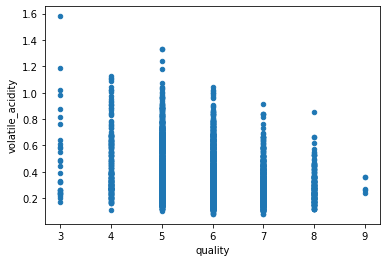

In [28]:
wine_df.plot(x='quality', y='volatile_acidity', kind='scatter');

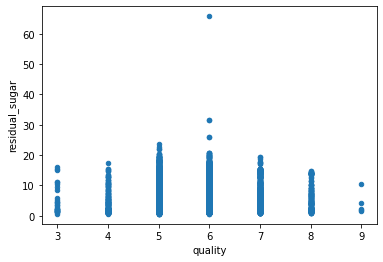

In [29]:
wine_df.plot(x='quality', y='residual_sugar', kind='scatter');

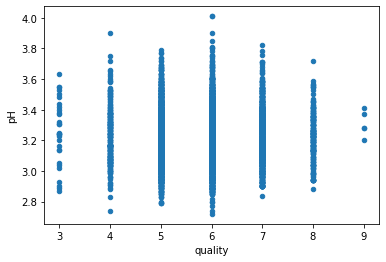

In [31]:
wine_df.plot(x='quality', y='pH', kind='scatter');

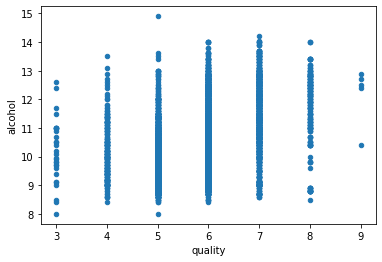

In [32]:
wine_df.plot(x='quality', y='alcohol', kind='scatter');

##### --> Based on the scatterplots of quality against different features, we can easily notice that alcohol content of the wines is most likely to have a positive impact on the wine's quality

## #Q2: Is a certain type of wine (red/white) associated with higher quality?

In [49]:
means_color = wine_df.groupby('color')['quality'].mean()
means_color

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

##### --> As we can see from the result above, the average quality of white wine (5.877909) is higher than the average quality of red wine (5.636023)

Now I will create visualizations to display the findings regarding the relationship between the wine quality and the type of wine (red/white)

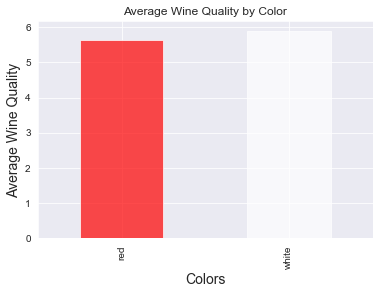

In [52]:
colors = ['red','white']
means_color.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=.7)
plt.xlabel('Colors', fontsize=14)
plt.ylabel('Average Wine Quality', fontsize=14);

#### The following visualization is a more detailed bar chart to show the proportion by wine and quality:

In [59]:
counts = wine_df.groupby(['quality','color']).count()['pH']
counts

quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: pH, dtype: int64

In [60]:
totals = wine_df.groupby('color').count()['pH']
totals

color
red      1599
white    4898
Name: pH, dtype: int64

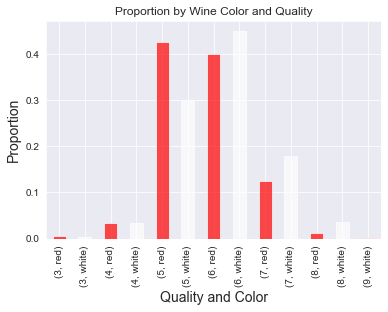

In [61]:
colors = ['red','white']
proportions = counts/totals
proportions.plot(kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=14)
plt.ylabel('Proportion', fontsize=14);

##### --> Based on the above bar chart, we can see that the majority of red wines has quality rating of 5, while the majority of white wine has quality rating of 6

#### Another bar chart style:

There is a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.

Red bar proportions = counts for each quality rating / total amount of red samples

White bar proportions = counts for each quality rating / total amount of white samples

In [62]:
# get counts for each rating and color
counts_color = wine_df.groupby(['color','quality']).count()['pH']
counts_color

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [65]:
# get total counts for each color
totals_color = wine_df.groupby('color').count()['pH']
totals_color

color
red      1599
white    4898
Name: pH, dtype: int64

In [66]:
# get red proportions by diving red rating counts by total amount of red samples
red_proportion = counts_color['red'] / totals_color['red']
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [67]:
# get white proportions by diving white rating counts by total amount of white samples
white_proportion = counts_color['white']/totals_color['white']
white_proportion

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

##### Plot proportions on a bar chart

We are missing a red wine value for the 9 rating. Even though this number is a 0, we still need it for our plot. The cell below will help to fix the issue:

In [70]:
red_proportion['9'] = 0
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

Set the x coordinate location for each rating group and and width of each bar.

In [71]:
ind = np.arange(len(red_proportion)) # the x locations for the group # results: array([0,1,2,3,4,5])
width = 0.35 # the width of the bars

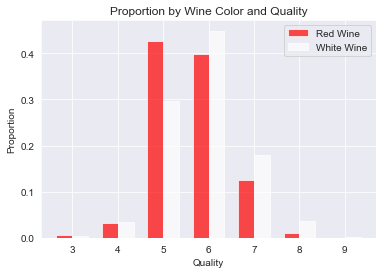

In [74]:
# plot bar
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind+width, white_proportion, width, color='w', alpha=.7, label='White Wine')

# title and label
plt.title('Proportion by Wine Color and Quality')
plt.xlabel('Quality')
plt.ylabel('Proportion')
locations = ind + width/2 # xtick locations
labels = ['3','4','5','6','7','8','9'] #xtick labels
plt.xticks(locations, labels)
plt.legend();

## #Q3: What level of acidity (pH values) receives the highest average rating?¶

In [75]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


As we can see, pH is a quantitative variable without clear categories so it's more tricky to clarify at which level is considered as low, medium, mod-high, and high. That's why it is neccessary to create the categories for the pH values.

Acidity levels can be divided into these categories:
1. High: Lowest 25% of pH values
2. Moderately High: 25% - 50% of pH values
3. Medium: 50% - 75% of pH values
4. Low: 75% - max pH value

#### View the min, 25%, 50%, 75% max pH values of the wine

In [77]:
wine_df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [78]:
# Bin edges that will be used to "cut" the data into groups:
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]
# The list was filled with the five values found from wine_df.describe().pH

In [80]:
# Labels for the four acidity level groups
bin_labels = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

Then I use Pandas cut() function to seperate the array elements into different bins. 

In [81]:
# create acidity_level column:
wine_df['acidity_level'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_labels)
# pH from (2.72, 3.11] : high, (3.11, 3.21] : mod_high, (3.21, 3.32] : medium, (3.32, 4.01] : low
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [83]:
# Find the average quality of each acidity level with groupby:
mean_acidity_level = wine_df.groupby('acidity_level').mean()['quality']
mean_acidity_level

acidity_level
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

##### --> Wines with low acidity level (pH values from 3.32 to 4.01) has the highest quality rating

#### Average Wine Quality by Acidity Level (Line plot)

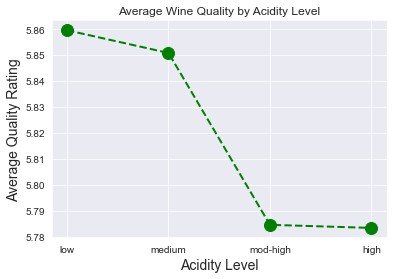

In [91]:
heights = [5.859593,5.850832,5.784540,5.783343]
labels = ['low','medium','mod-high','high']

plt.plot(labels, heights, color='g',marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('Average Wine Quality by Acidity Level')
plt.xlabel('Acidity Level', fontsize=14)
plt.ylabel('Average Quality Rating', fontsize=14);

##### --> The line plot clearly shows wines with low acidity level content receives the highest average quality rating

In [98]:
wine_df.to_csv('winequality_combined.csv', index=False)

## #Q4: Do wines with higher alcoholic content receive better ratings?

Similar to pH values, alcohol values are quantitative so there are no clear category to defind at which alcoholic content is considered as Low or High. To find the answer for this question, I will use query to divide the wine samples into two groups:

1. Low alcohol (samples with alcohol content less than the median)
2. High alcohol (samples with alcohol content greater than or equal to the median)

Lastly, find the average quality rating for each group (low alcohol, high alcohol)

In [95]:
median_alcohol = wine_df['alcohol'].median()
median_alcohol

10.3

In [97]:
low_alcohol = wine_df.query('alcohol < {}'.format(median_alcohol))
low_alcohol

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white,high
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white,high
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white,medium
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,mod_high


In [99]:
high_alcohol = wine_df.query('alcohol >= {}'.format(median_alcohol))
high_alcohol

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red,medium
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,red,low
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,6.1,0.340,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white,high
4891,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white,medium
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


In [103]:
# double check to ensure these queries included each sample exactly once:
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [108]:
low = low_alcohol.quality.mean()

In [109]:
high = high_alcohol.quality.mean()

#### Average Quality Rating by Alcoholic Content (Bar chart)

In [106]:
plt.bar?

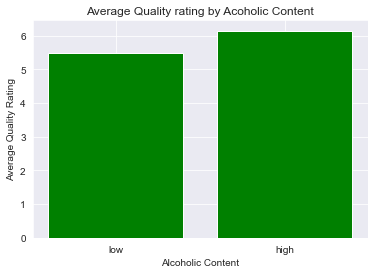

In [110]:
locations = [1,2]
heights = [low, high]
labels = ['low', 'high']
plt.bar(locations, heights, color='g', tick_label=labels)
plt.title('Average Quality rating by Acoholic Content')
plt.xlabel('Alcoholic Content')
plt.ylabel('Average Quality Rating');

##### --> Wines with high alcoholic content receive better quality rating

## #Q5: Do sweeter wines (more residual sugar) receive better ratings?

#### The way to find the insight to this question is similar with #Q4

In [111]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [112]:
median_sugar = wine_df.residual_sugar.median()
median_sugar

3.0

In [113]:
low_sugar = wine_df.query('residual_sugar < {}'.format(median_sugar))
high_sugar = wine_df.query('residual_sugar >= {}'.format(median_sugar))

In [115]:
avg_quality_low_sugar = low_sugar.quality.mean()
avg_quality_low_sugar

5.808800743724822

In [116]:
avg_quality_high_sugar = high_sugar.quality.mean()
avg_quality_high_sugar

5.82782874617737

#### Average Quality Rating by Residual Sugar Content

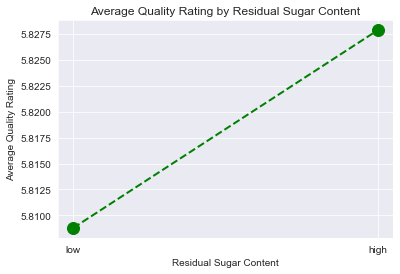

In [118]:
sugar_heights = [avg_quality_low_sugar, avg_quality_high_sugar]
labels = ['low', 'high']

plt.plot(labels, sugar_heights, color='g',marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('Average Quality Rating by Residual Sugar Content')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');

##### --> The higher the residual sugar content, the better the quality rating